In [1]:


from agent.OnOff_Agent import OnOffAgent
from environment.ContinuousEnvironment import ContinuousSimpleEnvironment

%load_ext autoreload
%autoreload 2

Iteration0


('C:\\Users\\Harold\\Desktop\\ENAC-Semester-Project\\DIET_Controller\\logs\\simple_simulation/results/OnOff_Agent/2022_6_11/results_2022_6_11_9_56',
           Tair  Tset       PMV        Heating    Reward       Occ
 0     7.082887    16 -3.646693       0.000000  1.000000  0.000000
 1     7.086892    16 -3.650172       0.000000  1.000000  0.000000
 2     7.099072    16 -3.651367       0.000000  1.000000  0.000000
 3     7.114199    16 -3.651018       0.000000  1.000000  0.000000
 4     7.130398    16 -3.649999       0.000000  1.000000  0.000000
 ..         ...   ...       ...            ...       ...       ...
 195  12.886764    21 -2.821489  509199.367087 -0.174045  0.812915
 196  13.065626    21 -2.776354  508863.286619 -0.155283  0.812915
 197  13.227205    21 -2.736439  508588.143491 -0.138639  0.812915
 198  13.471043    21 -2.699867  490478.895734 -0.123430  1.354858
 199  13.706177    21 -2.649059  492132.157609 -0.391504  1.354858
 
 [200 rows x 6 columns])

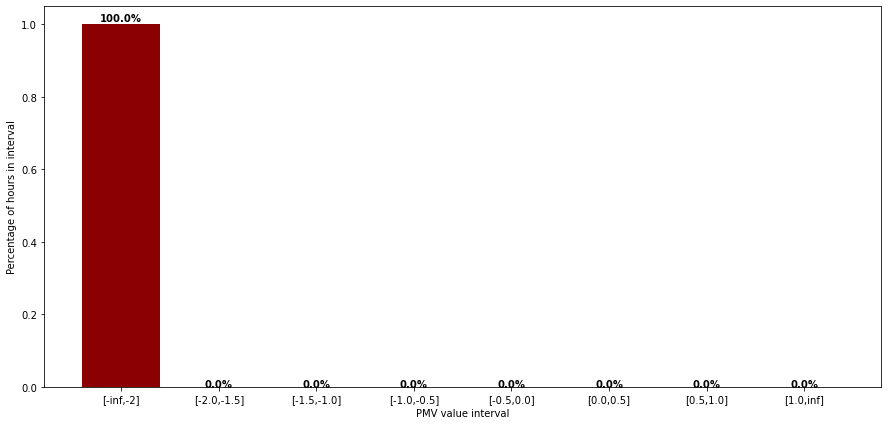

In [3]:
env = ContinuousSimpleEnvironment(param_list=['Tair', 'RH', 'Tmrt', 'Tout', 'Qheat', 'Occ'],
alpha=0.5,
beta=1,
min_temp=16,
max_temp=21,
modelname='CELLS_v1.fmu',
simulation_path=r'C:\Users\Harold\Desktop\ENAC-Semester-Project\DIET_Controller\EnergyPlus_simulations\simple_simulation',
days=151,
hours=24,
minutes=60,
seconds=60,
ep_timestep=6)


logging_path = r"C:\Users\Harold\Desktop\ENAC-Semester-Project\DIET_Controller\logs\simple_simulation"


agent = OnOffAgent(env=env)


agent.train(logging_path=logging_path, num_episodes=1, num_iterations=200, log=True)